In [94]:
import json
import pandas as pd
import numpy as np
import re

In [3]:
file_dir = '/Users/alexhatheway/Desktop/DataViz/Week_8_ETL/Movies-ETL/Data/'

#file_name = 'wikipedia-movies.json'

with open(f'{file_dir}wikipedia-movies.json', mode = 'r') as file:
    wiki_movies_raw = json.load(file)

len(wiki_movies_raw)

7311

In [5]:
# return first five records - or 6-11 in this case
wiki_movies_raw[6:11]

[{'url': 'https://en.wikipedia.org/wiki/American_Dream_(film)',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0099028/',
  'title': 'American Dream',
  'Directed by': ['Barbara Kopple',
   'Co-directors:',
   'Cathy Caplan',
   'Thomas Haneke',
   'Lawrence Silk'],
  'Produced by': ['Arthur Cohn', 'Barbara Kopple'],
  'Music by': 'Michael Small',
  'Cinematography': ['Tom Hurwitz', 'Mathieu Roberts', 'Nesya Shapiro'],
  'Edited by': ['Cathy Caplan', 'Thomas Haneke', 'Lawrence Silk'],
  'Productioncompany ': ['Cabin Creek',
   'Catholic Communication Campaign',
   'Channel 4 Films'],
  'Distributed by': 'Prestige Films',
  'Release date': ['October 6, 1990',
   '(',
   '1990-10-06',
   ')',
   '(',
   'New York Film Festival',
   ')'],
  'Running time': '100 minutes',
  'Country': ['United States', 'United Kingdom'],
  'Language': 'English'},
 {'url': 'https://en.wikipedia.org/wiki/American_Ninja_4:_The_Annihilation',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/t

In [6]:
# return last 5 records remember that :
wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [7]:
kaggle_metadata = pd.read_csv(f'{file_dir}movies_metadata.csv', low_memory = False)

ratings = pd.read_csv(f'{file_dir}ratings.csv')

In [10]:
kaggle_metadata.sample(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
31236,False,NaN,0,"[{'id': 16, 'name': 'Animation'}]",NaN,193652,tt0029350,en,An Optical Poem,A dance of shapes.,...,1937-01-01,0.0,6.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,An Optical Poem,False,7.2,13.0
23424,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,276122,tt3219678,en,A Brony Tale,Vancouver-based voice artist Ashleigh Ball has...,...,2014-07-08,0.0,79.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A film about men....who like My Little Pony,A Brony Tale,False,6.3,9.0
22691,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",NaN,295841,tt0093345,en,Killer Instinct,"For America, the Vietnam War is over. Johnny d...",...,1988-01-01,0.0,88.0,[],Released,NaN,Killer Instinct,False,6.0,1.0
6860,False,NaN,20000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 35, 'na...",NaN,2612,tt0100201,en,Mr. Destiny,Larry Burrows is unhappy and feels powerless o...,...,1990-10-12,15379253.0,110.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Larry Burrows Wished For It All... Until All T...,Mr. Destiny,False,6.1,60.0
30545,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,44511,tt0892332,en,Noodle,"At thirty-seven, Miri is a twice-widowed, El A...",...,2007-07-26,0.0,90.0,"[{'iso_639_1': 'he', 'name': 'עִבְרִית'}, {'is...",Released,NaN,Noodle,False,7.1,5.0
15000,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,52637,tt1149363,fr,Yuki & Nina,When Yuki finds out that her parents are separ...,...,2009-11-27,0.0,92.0,"[{'iso_639_1': 'ja', 'name': '日本語'}, {'iso_639...",Released,NaN,Yuki & Nina,False,5.5,1.0
39928,False,NaN,0,[],NaN,199929,tt2488740,en,Mister John,"After discovering his wife's infidelities, Ger...",...,2013-06-27,0.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Mister John,False,5.7,3.0
41452,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,328416,tt0091170,en,Hard Choices,A teenaged boy goes for a ride with his brothe...,...,1986-05-16,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Hard Choices,False,0.0,0.0
39193,False,NaN,0,"[{'id': 10402, 'name': 'Music'}, {'id': 99, 'n...",NaN,381080,tt5105736,en,The Art of Organized Noize,Organized Noize shaped the landscape of Hip Ho...,...,2016-03-15,0.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Art of Organized Noize,False,8.0,5.0
44846,False,"{'id': 315054, 'name': 'Dark World Collection'...",0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 9648, '...",NaN,51273,tt1746246,ru,Тёмный мир,"In Russia, the mystic student of linguistic Ma...",...,2010-10-07,0.0,100.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Dark World,False,4.2,16.0


In [11]:
ratings.sample(10)

,userId,movieId,rating,timestamp
1769297,18366,5017,3.5,1447371443
16426053,170747,1073,3.5,1275023619
15195294,158133,2006,3.5,1357186854
10173553,104970,541,3.0,836445368
14418406,149856,5669,4.5,1177380520
6861331,70803,5816,3.5,1385598483
24764214,257460,4223,2.5,1231155966
11651191,120873,2959,5.0,975432793
19849198,206295,1198,4.0,1050518872
10283821,106146,267,1.0,831845048


In [14]:
# load raw data into dataframe and inspect it
wiki_movies_df = pd.DataFrame(wiki_movies_raw)
wiki_movies_df.tail(10)

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
7301,https://en.wikipedia.org/wiki/Aquaman_(film),2018.0,https://www.imdb.com/title/tt1477834/,Aquaman,James Wan,"[Peter Safran, Rob Cowan]","[David Leslie Johnson-McGoldrick, Will Beall]","[Geoff Johns, James Wan, Will Beall]","[Aquaman, by, Paul Norris, Mort Weisinger]","[Jason Momoa, Amber Heard, Willem Dafoe, Patri...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7302,https://en.wikipedia.org/wiki/Bumblebee_(film),2018.0,https://www.imdb.com/title/tt4701182/,Bumblebee,Travis Knight,"[Lorenzo di Bonaventura, Tom DeSanto, Don Murp...",NaN,NaN,"[Transformers, by, Hasbro]","[Hailee Steinfeld, John Cena, Jorge Lendeborg ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7303,https://en.wikipedia.org/wiki/Welcome_to_Marwen,2018.0,https://www.imdb.com/title/tt3289724/,Welcome to Marwen,Robert Zemeckis,"[Jack Rapke, Steve Starkey, Robert Zemeckis]","[Caroline Thompson, Robert Zemeckis]",NaN,NaN,"[Steve Carell, Leslie Mann, Diane Kruger, Merr...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7304,https://en.wikipedia.org/wiki/Second_Act_(film),2018.0,https://www.imdb.com/title/tt2126357/,Second Act,Peter Segal,"[Jennifer Lopez, Elaine Goldsmith-Thomas, Just...",NaN,NaN,NaN,"[Jennifer Lopez, Leah Remini, Vanessa Hudgens,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7305,https://en.wikipedia.org/wiki/Cold_War_(2018_f...,2018.0,https://www.imdb.com/title/tt6543652/,Cold War,Paweł Pawlikowski,"[Tanya Seghatchian, Ewa Puszczyńska]",NaN,NaN,NaN,"[Joanna Kulig, Tomasz Kot, Borys Szyc, Agata K...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zimna wojna
7306,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018.0,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7307,https://en.wikipedia.org/wiki/Vice_(2018_film),2018.0,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7308,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018.0,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7309,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018.0,https://www.imdb.com/title/tt7137380/,Destroyer,Karyn Kusama,"[Fred Berger, Phil Hay, Matt Manfredi]",NaN,NaN,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7310,https://en.wikipedia.org/wiki/Black_Mirror:_Ba...,2018.0,https://www.imdb.com/title/tt9495224/,Bandersnatch,David Slade,Russell McLean,NaN,NaN,NaN,"[Fionn Whitehead, Will Poulter, Craig Parkinso...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# load columns into list and inspect them
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [19]:
# use list comprehension to filter out results that do not have a director or imdb link
#if ('Director' in movie or 'Directed by' in movie) and 'imdb_link' in movie

wiki_movies = [movie for movie in wiki_movies_raw \
              if ('Director' in movie or 'Directed by' in movie)\
               and 'imdb_link' in movie \
              and 'No. of episodes' not in movie]
len(wiki_movies)

7076

In [21]:
wiki_movies_df = pd.DataFrame(wiki_movies)
wiki_movies_df

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7072,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7073,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7074,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,Karyn Kusama,"[Fred Berger, Phil Hay, Matt Manfredi]",NaN,NaN,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Length',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Picture format',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Running time',
 'Screen story by',
 'Screenplay by',
 'Starring',
 'Story by',
 'Suggested by',
 'Theme music composer',
 'Venue',
 'Voices of',
 'Written by',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [60]:
# create function to remove alternate titles
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish', 'alt_titles']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
        if len(alt_titles) > 0:
            movie['alt_titles'] = alt_titles
        
        # consolidate director and directed by columns
        def change_column_name(old_name, new_name):
            if old_name in movie:
                movie[new_name] = movie.pop(old_name)
        
        #find columns to remove
        change_column_name('Adaptation by', 'Writer(s)')
        change_column_name('Country of origin', 'Country')
        change_column_name('Directed by', 'Director')
        change_column_name('Distributed by', 'Distributor')
        change_column_name('Edited by', 'Editor(s)')
        change_column_name('Length', 'Running time')
        change_column_name('Original release', 'Release date')
        change_column_name('Music by', 'Composer(s)')
        change_column_name('Produced by', 'Producer(s)')
        change_column_name('Producer', 'Producer(s)')
        change_column_name('Written by', 'Writer(s)')
        change_column_name('Productioncompanies ', 'Production company(s)')
        change_column_name('Productioncompany ', 'Production company(s)')
        change_column_name('Released', 'Release Date')
        change_column_name('Release date', 'Release Date')
        change_column_name('Screen story by', 'Writer(s)')
        change_column_name('Screenplay by', 'Writer(s)')
        change_column_name('Story by', 'Writer(s)')
        change_column_name('Theme music composer', 'Composer(s)')
        change_column_name('Written by', 'Writer(s)')
        
    return movie

In [61]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [62]:
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release Date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [63]:
len(sorted(wiki_movies_df.columns.tolist()))

39

In [65]:
# The regular expression for a group of characters that start with "tt" and has seven digits is "(tt\d{7})"

wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Running time,Country,...,Created by,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,102 minutes,United States,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,114 minutes,United States,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,113 minutes,United States,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,106 minutes,United States,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,95 minutes,US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [71]:
# return number null values per column
[[column, wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Cinematography', 691],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Editor(s)', 548],
 ['Composer(s)', 518],
 ['Producer(s)', 202],
 ['Production company(s)', 1678],
 ['Release Date', 32],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Label', 7031],
 ['Animation by', 7031],
 ['Color process', 7032],
 ['imdb_id', 0]]

In [73]:
# return columns in which 90% or more have values
[column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]

['url',
 'year',
 'imdb_link',
 'title',
 'Based on',
 'Starring',
 'Cinematography',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Director',
 'Distributor',
 'Editor(s)',
 'Composer(s)',
 'Producer(s)',
 'Production company(s)',
 'Release Date',
 'Writer(s)',
 'imdb_id']

In [76]:
#make a list of columns to keep
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]

In [77]:
#update the dataframe with just the columns to keep
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]

In [78]:
wiki_movies_df.head(20)

,url,year,imdb_link,title,Based on,Starring,Cinematography,Running time,Country,Language,...,Box office,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Release Date,Writer(s),imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,102 minutes,United States,English,...,$21.4 million,Renny Harlin,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[July 11, 1990, (, 1990-07-11, )]","[David Arnott, James Cappe]",tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,114 minutes,United States,English,...,$2.7 million,James Foley,Avenue Pictures,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...","[James Foley, Robert Redlin]",tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,113 minutes,United States,"[English, Lao]",...,"$57,718,089",Roger Spottiswoode,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[August 10, 1990, (, 1990-08-10, )]","[John Eskow, Richard Rush]",tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,106 minutes,United States,English,...,"$7,331,647",Woody Allen,Orion Pictures,Susan E. Morse,NaN,Robert Greenhut,NaN,"[December 25, 1990, (, 1990-12-25, )]",Woody Allen,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,95 minutes,US,English,...,"$6,939,946 (USA)",John Cornell,Paramount Pictures,David Stiven,Maurice Jarre,John Cornell,NaN,"December 19, 1990",Paul Hogan,tt0099018
5,https://en.wikipedia.org/wiki/The_Ambulance,1990,https://www.imdb.com/title/tt0099026/,The Ambulance,NaN,"[Eric Roberts, James Earl Jones, Red Buttons, ...",Jacques Haitkin,95 minutes,United States,English,...,NaN,Larry Cohen,Triumph Releasing Corporation,"[Claudia Finkle, Armond Leibowitz]",Jay Chattaway,"[Larry Cohen, Moctesuma Esparza, Robert Katz]",Epic Productions,"[March 22, 1990, (, 1990-03-22, )]",Larry Cohen,tt0099026
6,https://en.wikipedia.org/wiki/American_Dream_(...,1990,https://www.imdb.com/title/tt0099028/,American Dream,NaN,NaN,"[Tom Hurwitz, Mathieu Roberts, Nesya Shapiro]",100 minutes,"[United States, United Kingdom]",English,...,NaN,"[Barbara Kopple, Co-directors:, Cathy Caplan, ...",Prestige Films,"[Cathy Caplan, Thomas Haneke, Lawrence Silk]",Michael Small,"[Arthur Cohn, Barbara Kopple]","[Cabin Creek, Catholic Communication Campaign,...","[October 6, 1990, (, 1990-10-06, ), (, New Yor...",NaN,tt0099028
7,https://en.wikipedia.org/wiki/American_Ninja_4...,1990,https://www.imdb.com/title/tt0101326/,American Ninja 4: The Annihilation,NaN,"[Michael Dudikoff, David Bradley, James Booth,...",NaN,99 minutes,"[United States, Lesotho]",English,...,NaN,Cedric Sundstrom,Cannon Group,NaN,NaN,Ovidio G Assonitis,NaN,"[March 8, 1991, (, 1991-03-08, )]",David Geeves,tt0101326
8,https://en.wikipedia.org/wiki/Andre%27s_Mother,1990,https://www.imdb.com/title/tt0099037/,Andre's Mother,NaN,"[Richard Thomas, Sada Thompson, Sylvia Sidney]",Bobby Bukowski,50 minutes,United States,English,...,NaN,Deborah Reinisch,Public Broadcasting Service,Jeffrey Wolf,Jonathan Sheffer,"[Sarah Green, Deborah Reinisch]",NaN,"[March 7, 1990, (, 1990-03-07, )]"

In [80]:
wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Release Date             object
Writer(s)                object
imdb_id                  object
dtype: object

In [81]:
box_office = wiki_movies_df['Box office'].dropna()

In [82]:
len(box_office)

5485

In [85]:
#create function to show which values are not strings
def is_not_string(x):
    return type(x) != str

In [86]:
# try the function
box_office[box_office.map(is_not_string)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [89]:
# use lambda function to determine which object types are not strings
# function - lambda x: type(x) != str
# use lambda function to join strings with space

#box_office[box_office.map(lambda x: type(x) != str)]
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

In [90]:
# test to see if there are strings again
box_office[box_office.map(is_not_string)]

Series([], Name: Box office, dtype: object)

In [92]:
# create variable to store regex to parse box office strings
form_one = r"\$\d+\.?\d*\s*[mb]illion"

In [96]:
# test how many matches in the box office column
box_office.str.contains(form_one, flags=re.IGNORECASE, na=False).sum()

3896

In [97]:
# create variable to store regex to parse another form of box office strings
form_two = r"\$\d{1,3}(?:,\d{3})+"

# test how many matches in the box office column
box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum()

1544

In [118]:
# create two boolean series to find box office values that don't match either
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)

In [100]:
# this will throw an error
box_office[(not matches_form_one) and (not matches_form_two)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [124]:
# revised expression using pandas
box_office[~matches_form_one & ~matches_form_two].count()

25

In [125]:
box_office[~matches_form_one & ~matches_form_two]

110                   $4.37 million
600                      $5000 (US)
1070                     35,254,617
1480                     £3 million
1865                   ¥1.1 billion
2032                            N/A
2091                           $309
2665    926,423 admissions (France)
3088              $33.1 million [1]
3631                            TBA
3859                  $40.3 million
3879       CN¥3.650 million (China)
4116                     £7,385,434
4261                  $23.9 million
4306                            $30
4561        $45.2k (only in Turkey)
5447                          £2.56
5784                       413 733$
6013                        Unknown
6145                  $18.4 million
6234                  $41.9 million
6369                          $111k
6370                           $588
6593                 less than $372
6843                        8 crore
Name: Box office, dtype: object

In [117]:
# revise forms to catch more values
form_one = r"\$\s*\d+\.?\d*\s*[mb]illi?on"
form_two = r"\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)"

In [123]:
# fix values given as a range
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [126]:
# create f string with capture group to extract data
box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


In [130]:
# create function to turn extracted values into numeric values

def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan
        
    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','',s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','',s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','',s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

In [131]:
# apply function to box office column of data frame
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [132]:
wiki_movies_df['box_office']

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7071    41900000.0
7072    76100000.0
7073    38400000.0
7074     5500000.0
7075           NaN
Name: box_office, Length: 7033, dtype: float64

In [133]:
wiki_movies_df.drop('Box office', axis=1, inplace=True)

In [135]:
# make sure new box office column is in place
wiki_movies_df.head()

,url,year,imdb_link,title,Based on,Starring,Cinematography,Running time,Country,Language,...,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Release Date,Writer(s),imdb_id,box_office
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,102 minutes,United States,English,...,Renny Harlin,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[July 11, 1990, (, 1990-07-11, )]","[David Arnott, James Cappe]",tt0098987,21400000.0
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,114 minutes,United States,English,...,James Foley,Avenue Pictures,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...","[James Foley, Robert Redlin]",tt0098994,2700000.0
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,113 minutes,United States,"[English, Lao]",...,Roger Spottiswoode,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[August 10, 1990, (, 1990-08-10, )]","[John Eskow, Richard Rush]",tt0099005,57718089.0
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,106 minutes,United States,English,...,Woody Allen,Orion Pictures,Susan E. Morse,NaN,Robert Greenhut,NaN,"[December 25, 1990, (, 1990-12-25, )]",Woody Allen,tt0099012,7331647.0
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,95 minutes,US,English,...,John Cornell,Paramount Pictures,David Stiven,Maurice Jarre,John Cornell,NaN,"December 19, 1990",Paul Hogan,tt0099018,6939946.0


In [138]:
#time to clean the budget data
#create a budget variable

budget = wiki_movies_df['Budget'].dropna()

In [139]:
#convert lists to strings
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

In [140]:
#remove any values between a dollar sign and a hyphen
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [141]:
# apply expressions to parse the box office data to the budget data
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [146]:
len(budget[~matches_form_one & ~matches_form_two])

38

In [149]:
# remove citation references (the numbers in brackets) from the budget data
budget = budget.str.replace(r'\[\d+\]\s*', '', regex=True)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

In [150]:
# apply parsing function to budget column of dataframe
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [155]:
wiki_movies_df.head()

,url,year,imdb_link,title,Based on,Starring,Cinematography,Running time,Country,Language,...,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Release Date,Writer(s),imdb_id,box_office,budget
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,102 minutes,United States,English,...,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[July 11, 1990, (, 1990-07-11, )]","[David Arnott, James Cappe]",tt0098987,21400000.0,20000000.0
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,114 minutes,United States,English,...,Avenue Pictures,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...","[James Foley, Robert Redlin]",tt0098994,2700000.0,6000000.0
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,113 minutes,United States,"[English, Lao]",...,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[August 10, 1990, (, 1990-08-10, )]","[John Eskow, Richard Rush]",tt0099005,57718089.0,35000000.0
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,106 minutes,United States,English,...,Orion Pictures,Susan E. Morse,NaN,Robert Greenhut,NaN,"[December 25, 1990, (, 1990-12-25, )]",Woody Allen,tt0099012,7331647.0,12000000.0
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,95 minutes,US,English,...,Paramount Pictures,David Stiven,Maurice Jarre,John Cornell,NaN,"December 19, 1990",Paul Hogan,tt0099018,6939946.0,25000000.0


In [154]:
wiki_movies_df.drop('Budget', axis=1, inplace=True)

In [157]:
release_date = wiki_movies_df['Release Date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

0                            July 11, 1990 ( 1990-07-11 )
1       May 17, 1990 ( 1990-05-17 ) (Cannes Film Marke...
2                          August 10, 1990 ( 1990-08-10 )
3                        December 25, 1990 ( 1990-12-25 )
4                                       December 19, 1990
                              ...                        
7071     December 25, 2018 ( 2018-12-25 ) (United States)
7072    December 11, 2018 ( 2018-12-11 ) ( Samuel Gold...
7073    November 8, 2018 ( 2018-11-08 ) ( AFI Fest ) D...
7074    August 31, 2018 ( 2018-08-31 ) ( Telluride ) D...
7075                      28 December 2018 ( 2018-12-28 )
Name: Release Date, Length: 7001, dtype: object

In [160]:
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[0123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

In [161]:
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,"November 8, 2018"
7074,"August 31, 2018"


In [162]:
#create new release_date column
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)

In [163]:
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [164]:
running_time

0                                 102 minutes
1                                 114 minutes
2                                 113 minutes
3                                 106 minutes
4                                  95 minutes
                        ...                  
7071                               90 minutes
7072                              132 minutes
7073                              120 minutes
7074                              123 minutes
7075    Variable; 90 minutes for default path
Name: Running time, Length: 6894, dtype: object

In [165]:
# see how many movies fit the xxx minutes format
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False).sum()

6528

In [166]:
# look at some that do not fit that format
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [167]:
#modify slightly to allow abreviations of minutes
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False).sum()

6877

In [172]:
#look at remaining entries
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [173]:
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [176]:
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

,0,1,2
0,NaN,NaN,102
1,NaN,NaN,114
2,NaN,NaN,113
3,NaN,NaN,106
4,NaN,NaN,95
...,...,...,...
7071,NaN,NaN,90
7072,NaN,NaN,132
7073,NaN,NaN,120
7074,NaN,NaN,123


In [177]:
#create new run time column
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [178]:
wiki_movies_df['running_time']

0       102
1       114
2       113
3       106
4        95
       ... 
7071     90
7072    132
7073    120
7074    123
7075     90
Name: running_time, Length: 7033, dtype: object

In [181]:
wiki_movies_df.drop('Running time', axis=1, inplace=True)

In [182]:
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [183]:
# check to see if data in the adult column is boolean
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
Name: adult, dtype: int64

In [186]:
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
#drop adult column
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult', axis='columns')

In [188]:
# check to make sure video column values are boolean
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [190]:
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [191]:
# convert numeric columns to numeric using to_numeric()

kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [192]:
#convert release_date to datetime

kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [194]:
ratings.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [195]:
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [196]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

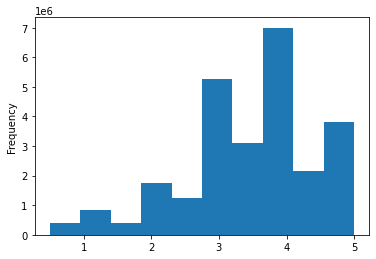

In [200]:
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

In [202]:
movies_df = pd.merge(wiki_movies_df, kaggle_metadata, on='imdb_id', suffixes=['_wiki','_kaggle'])

In [203]:
movies_df.head()

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Country,Language,Director,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,United States,English,Renny Harlin,...,1990-07-11,"20,423,389.00",104.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Kojak. Columbo. Dirty Harry. Wimps.,The Adventures of Ford Fairlane,False,6.20,72.00
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,United States,English,James Foley,...,1990-08-24,0.00,114.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All they risked was everything.,"After Dark, My Sweet",False,6.50,17.00
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,United States,"[English, Lao]",Roger Spottiswoode,...,1990-08-10,"33,461,269.00",112.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The few. The proud. The totally insane.,Air America,False,5.30,146.00
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,United States,English,Woody Allen,...,1990-12-25,0.00,102.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Alice,False,6.30,57.00
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,US,English,John Cornell,...,1990-12-21,0.00,95.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Who does he think he is?,Almost an Angel,False,5.60,23.00


In [215]:
movies_df.dtypes

url                              object
year                              int64
imdb_link                        object
title_wiki                       object
Based on                         object
Starring                         object
Cinematography                   object
Country                          object
Language                         object
Director                         object
Distributor                      object
Editor(s)                        object
Composer(s)                      object
Producer(s)                      object
Production company(s)            object
Release Date                     object
Writer(s)                        object
imdb_id                          object
box_office                      float64
budget_wiki                     float64
release_date_wiki        datetime64[ns]
running_time                     object
belongs_to_collection            object
budget_kaggle                     int64
genres                           object


In [ ]:
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle           drop wikipedia titles
# running_time             runtime                keep kaggle, fill in zeros with wiki data
# budget_wiki              budget_kaggle          keep kaggle, fill in zeros with wiki
# box_office               revenue                keep kaggle, fill in zeros with wiki
# release_date_wiki        release_date_kaggle    drop wikipedia
# Language                 original_language      drop wikipedia
# Production company(s)    production_companies   drop wikipedia

In [204]:
#look at rows where titles don't match
movies_df[movies_df['title_wiki'] != movies_df['title_kaggle']][['title_wiki', 'title_kaggle']]

,title_wiki,title_kaggle
27,China Cry,China Cry: A True Story
36,Daddy's Dyin' ...Who's Got the Will?,Daddy's Dyin'... Who's Got the Will?
38,The Dark Side of the Moon,The Dark Side of The Moon
42,Delta Force 2,Delta Force 2: The Colombian Connection
48,DuckTales the Movie:Treasure of the Lost Lamp,DuckTales: The Movie - Treasure of the Lost Lamp
...,...,...
5956,Chips,CHiPS
5971,Spark,Spark: A Space Tail
5994,Pirates of the Caribbean:Dead Men Tell No Tales,Pirates of the Caribbean: Dead Men Tell No Tales
6023,Valerian and the Cityof a Thousand Planets,Valerian and the City of a Thousand Planets


In [209]:
#show rows wher title_kaggle is empty
movies_df[(movies_df['title_kaggle'] == '') | (movies_df['title_kaggle'].isnull())]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Country,Language,Director,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


In [217]:
#convert values to numbers because the chart isn't plotting
movies_df['running_time'] = pd.to_numeric(movies_df['running_time'])
movies_df['runtime'] = pd.to_numeric(movies_df['runtime'])

<AxesSubplot:xlabel='running_time', ylabel='runtime'>

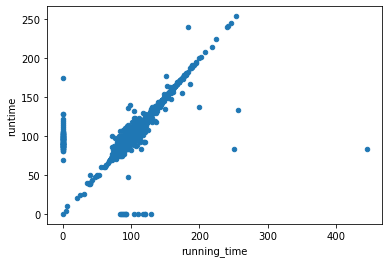

In [218]:
# compare run time columns to see how similar by creating a plot
movies_df.fillna(0).plot(x='running_time', y='runtime', kind='scatter')

<AxesSubplot:xlabel='budget_wiki', ylabel='budget_kaggle'>

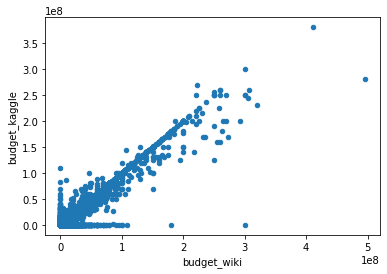

In [224]:
movies_df.fillna(0).plot(x='budget_wiki', y='budget_kaggle', kind='scatter')

<AxesSubplot:xlabel='box_office', ylabel='revenue'>

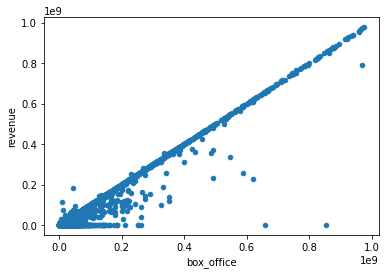

In [225]:
movies_df.fillna(0)[movies_df['box_office'] < 10**9].plot(x='box_office', y='revenue', kind='scatter')

<AxesSubplot:xlabel='release_date_kaggle'>

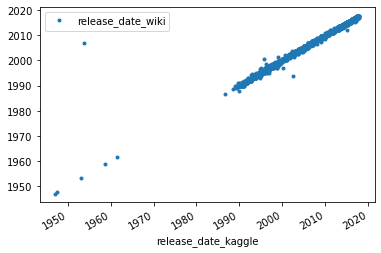

In [226]:
# release date
movies_df[['release_date_wiki', 'release_date_kaggle']].plot(x='release_date_kaggle', style='.')

In [227]:
movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Country,Language,Director,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
3607,https://en.wikipedia.org/wiki/The_Holiday,2006,https://www.imdb.com/title/tt00457939/,The Holiday,NaN,"[Kate Winslet, Cameron Diaz, Jude Law, Jack Bl...",Dean Cundey,United States,English,Nancy Meyers,...,1953-08-28,"30,500,000.00",118.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pouring out of impassioned pages...brawling th...,From Here to Eternity,False,7.20,137.00


In [228]:
movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')].index

Int64Index([3607], dtype='int64')

In [229]:
movies_df = movies_df.drop(movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')].index)

In [230]:
#check for null values in release date wiki data
movies_df[movies_df['release_date_wiki'].isnull()]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Country,Language,Director,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
1008,https://en.wikipedia.org/wiki/Black_Scorpion_(...,1995,https://www.imdb.com/title/tt0112519/,Black Scorpion,NaN,"[Joan Severance, Bruce Abbott, Garrett Morris]",Geoff George,United States,NaN,Jonathan Winfrey,...,1995-08-22,0.00,92.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Justice has a nasty sting.,Black Scorpion,False,6.10,7.00
1061,https://en.wikipedia.org/wiki/Flirt_(1995_film),1995,https://www.imdb.com/title/tt0113080/,Flirt,NaN,"[Bill Sage, Dwight Ewell, Miho Nikaido]",Michael Spiller,"[United States, Germany, Japan, [1]]",NaN,Hal Hartley,...,1995-09-14,0.00,85.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Flirt,False,7.50,4.00
1121,https://en.wikipedia.org/wiki/Let_It_Be_Me_(19...,1995,https://www.imdb.com/title/tt0113638/,Let It Be Me,NaN,NaN,Miroslav Ondrícek,NaN,NaN,Eleanor Bergstein,...,1995-11-17,0.00,95.00,[],Released,NaN,Let It Be Me,False,8.00,2.00
1564,https://en.wikipedia.org/wiki/A_Brooklyn_State...,1997,https://www.imdb.com/title/tt0118782/,A Brooklyn State of Mind,NaN,NaN,Ken Kelsch,NaN,NaN,Frank Rainone,...,1998-01-01,0.00,89.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,A Brooklyn State of Mind,False,5.00,1.00
1633,https://en.wikipedia.org/wiki/Highball_(film),1997,https://www.imdb.com/title/tt0119291/,Highball,NaN,"[Justine Bateman, Peter Bogdanovich, Chris Eig...",Steven Bernstein,United States,English,"[Noah Baumbach, (as Ernie Fusco)]",...,1997-01-01,0.00,110.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Highball,False,4.50,4.00
1775,https://en.wikipedia.org/wiki/Velocity_Trap,1997,https://www.imdb.com/title/tt0120435/,Velocity Trap,NaN,"[Olivier Gruner, Alicia Coppola, Ken Olandt]",Philip D. Schwartz,United States,NaN,Phillip J. Roth,...,1999-02-22,0.00,86.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Crime at the Speed of Light,Velocity Trap,False,4.70,6.00
2386,https://en.wikipedia.org/wiki/The_Visit_(2000_...,2000,https://www.imdb.com/title/tt0199129/,The Visit,NaN,"[Hill Harper, Billy Dee Williams, Obba Babatun...",John L. Demps Jr.,NaN,English,Jordan Walker-Pearlman,...,2000-01-01,0.00,107.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Rumored,NaN,The Visit,False,0.00,0.00
2786,https://en.wikipedia.org/wiki/Stevie_(2002_film),2002,https://www.imdb.com/title/tt0334416/,Stevie,NaN,NaN,"[Dana Kupper, Gordon Quinn, Peter Gilbert]",United States,English,Steve James,...,2002-09-09,"97,000.00",140.00,[],NaN,NaN,Stevie,False,6.70,13.00
3174,https://en.wikipedia.org/wiki/Return_to_Sender...,2004,https://www.imdb.com/title/tt0396190/,Return to Sender,NaN,"[Aidan Quinn, Connie Nielsen, Mark Holton]",NaN,"[Denmark, USA, UK]",NaN,Bille August,...,2004-09-17,0.00,109.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"How can you save someone, who won't save herself?",Return to Sender,False,5.90,13.00
3651,https://en.wikipedia.org/wiki/Live_Free_or_Die...,2006,https://www.imdb.com/title/tt0432318/,Live Free or Die,NaN,"[Aaron Stanford, Paul Schneider, Ebon Moss-Bac...",NaN,United States,English,"[Gregg Kavet, Andy Robin]",...,2006-03-11,0.00,89.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Live Free or Die,False,5.50,8.00


In [237]:
#find value counts of language columns
movies_df['Language'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


English                               5479
[English, Spanish]                      68
[English, French]                       35
[English, Japanese]                     25
[English, Russian]                      23
                                      ... 
Yucatec Mayan                            1
[English, Greek, German, Italian]        1
[English, Russian, Serbo-Croatian]       1
[Mandarin Chinese, English]              1
[English, Lao]                           1
Name: Language, Length: 197, dtype: int64

In [236]:
#convert lists to tuples so they hash whatever that means -- so we don't get an error
movies_df['Language'].apply(lambda x: tuple(x) if type(x) == list else x).value_counts(dropna=False)

English                       5479
NaN                            134
(English, Spanish)              68
(English, French)               35
(English, Japanese)             25
                              ... 
(English, Yiddish, Hebrew)       1
(English, Scottish Gaelic)       1
(English, /, Irish)              1
Yucatec Mayan                    1
(English, Indonesian, [2])       1
Name: Language, Length: 198, dtype: int64

In [234]:
#look at the production company data
movies_df[['Production company(s)','production_companies']]

,Production company(s),production_companies
0,Silver Pictures,[{'name': 'Twentieth Century Fox Film Corporat...
1,Avenue Pictures,"[{'name': 'Avenue Pictures Productions', 'id':..."
2,"[Carolco Pictures, IndieProd Company]","[{'name': 'IndieProd Company Productions', 'id..."
3,NaN,"[{'name': 'Orion Pictures', 'id': 41}]"
4,NaN,"[{'name': 'Paramount Pictures', 'id': 4}]"
...,...,...
6047,"[Fabula, Komplizen Film]","[{'name': 'Komplizen Film', 'id': 1618}, {'nam..."
6048,Ball & Chain Productions,"[{'name': 'Ball & Chain Productions', 'id': 74..."
6049,"[Arte France Cinéma, Why Not Productions]","[{'name': 'ARTE France Cinéma', 'id': 94}, {'n..."
6050,"[Film Science, Rough House Pictures, Syncopate...","[{'name': 'Film Science', 'id': 1976}, {'name'..."


In [ ]:
#the plan, now complete and in a more convenient spot
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle           drop wikipedia titles
# running_time             runtime                keep kaggle, fill in zeros with wiki data
# budget_wiki              budget_kaggle          keep kaggle, fill in zeros with wiki
# box_office               revenue                keep kaggle, fill in zeros with wiki
# release_date_wiki        release_date_kaggle    drop wikipedia
# Language                 original_language      drop wikipedia
# Production company(s)    production_companies   drop wikipedia

In [239]:
# drop wikipedia data for title, release, language and production company
movies_df.drop(columns=['title_wiki','release_date_wiki','Language','Production company(s)'], inplace=True)

KeyError: "['title_wiki' 'release_date_wiki' 'Language' 'Production company(s)'] not found in axis"

In [240]:
movies_df

,url,year,imdb_link,Based on,Starring,Cinematography,Country,Director,Distributor,Editor(s),...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,United States,Renny Harlin,20th Century Fox,Michael Tronick,...,1990-07-11,"20,423,389.00",104.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Kojak. Columbo. Dirty Harry. Wimps.,The Adventures of Ford Fairlane,False,6.20,72.00
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,United States,James Foley,Avenue Pictures,Howard E. Smith,...,1990-08-24,0.00,114.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All they risked was everything.,"After Dark, My Sweet",False,6.50,17.00
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,United States,Roger Spottiswoode,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",...,1990-08-10,"33,461,269.00",112.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The few. The proud. The totally insane.,Air America,False,5.30,146.00
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,United States,Woody Allen,Orion Pictures,Susan E. Morse,...,1990-12-25,0.00,102.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Alice,False,6.30,57.00
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,US,John Cornell,Paramount Pictures,David Stiven,...,1990-12-21,0.00,95.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Who does he think he is?,Almost an Angel,False,5.60,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6047,https://en.wikipedia.org/wiki/A_Fantastic_Woman,2018,https://www.imdb.com/title/tt5639354/,NaN,"[Daniela Vega, Francisco Reyes]",Benjamín Echazarreta,"[Chile, Germany, Spain, United States, [2]]",Sebastián Lelio,"[Participant Media (Chile), Piffl Medien (Germ...",Soledad Salfate,...,2017-04-06,0.00,104.00,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,A Fantastic Woman,False,7.20,13.00
6048,https://en.wikipedia.org/wiki/Permission_(film),2018,https://www.imdb.com/title/tt5390066/,NaN,"[Rebecca Hall, Dan Stevens, Morgan Spector, Fr...",Adam Bricker,United States,Brian Crano,Good Deed Entertainment,Matt Friedman,...,2017-04-22,0.00,96.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Permission,False,0.00,1.00
6049,https://en.wikipedia.org/wiki/Loveless_(film),2018,https://www.imdb.com/title/tt6304162/,NaN,"[Maryana Spivak, Aleksey Rozin, Matvey Novikov...",Mikhail Krichman,"[Russia, France, Belgium, Germany, [3]]",Andrey Zvyagintsev,"[Sony Pictures Releasing, (Russia), [1]]",Anna Mass,...,2017-06-01,0.00,128.00,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Loveless,False,7.80,26.00
6050,https://en.wikipedia.org/wiki/Gemini_(2017_film),2018,https://www.imdb.com/title/tt5795086/,NaN,"[Lola Kirke, Zoë Kravitz, Greta Lee, Michelle ...",Andrew Reed,United States,Aaron Katz,Neon,Aaron Katz,...,2017-03-12,0.00,92.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,Gemini,False,0.00,0.00


In [241]:
# create function to fill in missing kaggle data and drop wiki columns
def fill_missing_kaggle_data(df, kaggle_column, wiki_column):
    df[kaggle_column] = df.apply(lambda row: row[wiki_column] if row[kaggle_column] == 0 else row[kaggle_column], axis = 1)
    df.drop(columns=wiki_column, inplace=True)

In [243]:
#run the function for runtime, budget and box office
fill_missing_kaggle_data(movies_df, 'runtime', 'running_time')
fill_missing_kaggle_data(movies_df, 'budget_kaggle', 'budget_wiki')
fill_missing_kaggle_data(movies_df, 'revenue', 'box_office')

KeyError: "['running_time'] not found in axis"

In [246]:
#check all columns
movies_df.columns

Index(['url', 'year', 'imdb_link', 'Based on', 'Starring', 'Cinematography',
       'Country', 'Director', 'Distributor', 'Editor(s)', 'Composer(s)',
       'Producer(s)', 'Release Date', 'Writer(s)', 'imdb_id',
       'belongs_to_collection', 'budget_kaggle', 'genres', 'homepage', 'id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date_kaggle', 'revenue', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title_kaggle', 'video', 'vote_average',
       'vote_count'],
      dtype='object')

In [248]:
'budget_wiki' in movies_df.columns

False

In [249]:
for col in movies_df.columns:
        lists_to_tuples = lambda x: tuple(x) if type(x) == list else x
        value_counts = movies_df[col].apply(lists_to_tuples).value_counts(dropna=False)
        num_values = len(value_counts)
        if num_values == 1:
            print(col)

video


In [250]:
movies_df['video'].value_counts(dropna=False)

False    6051
Name: video, dtype: int64

In [251]:
movies_df = movies_df.loc[:, ['imdb_id','id','title_kaggle','original_title','tagline','belongs_to_collection','url','imdb_link',
                       'runtime','budget_kaggle','revenue','release_date_kaggle','popularity','vote_average','vote_count',
                       'genres','original_language','overview','spoken_languages','Country',
                       'production_companies','production_countries','Distributor',
                       'Producer(s)','Director','Starring','Cinematography','Editor(s)','Writer(s)','Composer(s)','Based on']]

In [252]:
movies_df.rename({'id':'kaggle_id',
                  'title_kaggle':'title',
                  'url':'wikipedia_url',
                  'budget_kaggle':'budget',
                  'release_date_kaggle':'release_date',
                  'Country':'country',
                  'Distributor':'distributor',
                  'Producer(s)':'producers',
                  'Director':'director',
                  'Starring':'starring',
                  'Cinematography':'cinematography',
                  'Editor(s)':'editors',
                  'Writer(s)':'writers',
                  'Composer(s)':'composers',
                  'Based on':'based_on'}, axis='columns', inplace=True)